# Food Delivery Time Prediction

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train test split library
from sklearn.model_selection import train_test_split

# Multicollinearity check library

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

# Regression algorithm library

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation metric library

from sklearn.metrics import mean_absolute_error

# Hyperparameter tuning library

from sklearn.model_selection import GridSearchCV

# Feature importance library

import shap

# Save model

import pickle

In [ ]:
# Loading the dataset
data = pd.read_csv('/content/sample_data/finalTrain.csv')

In [ ]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


# EDA and FE

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [ ]:
data.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [ ]:
# Handling null values
from sklearn.impute import SimpleImputer

mean_cols = ["Delivery_person_Age", "Delivery_person_Ratings"]

mode_cols = ["Weather_conditions", "Road_traffic_density", 
             "multiple_deliveries", "Festival", "City"]

mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

for col in mean_cols:
    data[col] = mean_imp.fit_transform(data[col].to_numpy().reshape(-1,1))

mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for col in mode_cols:
    data[col] = mode_imp.fit_transform(data[col].to_numpy().reshape(-1,1))

data["Time_Orderd"] = data["Time_Orderd"].fillna(data["Time_Order_picked"])

In [ ]:
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [ ]:
# Check for duplicates
data.duplicated().sum()

0

In [ ]:
# Retrieval all categorical data columns

cat_col = [col_name for col_name in data.columns if data[col_name].dtypes == 'O']

# Check all value in categorical data

for col in cat_col:
    print(data[col].value_counts())
    print('\t')

0xcdcd    1
0xa63a    1
0xa16d    1
0xa561    1
0xa9a5    1
         ..
0x17ff    1
0x2205    1
0x666     1
0xb932    1
0x5fb2    1
Name: ID, Length: 45584, dtype: int64
	
JAPRES11DEL02     67
PUNERES01DEL01    67
VADRES11DEL02     66
VADRES08DEL02     66
JAPRES03DEL01     66
                  ..
GOARES01DEL03      7
DEHRES18DEL03      7
KOCRES16DEL03      6
KOLRES09DEL03      6
BHPRES010DEL03     5
Name: Delivery_person_ID, Length: 1320, dtype: int64
	
15-03-2022    1192
03-04-2022    1178
13-03-2022    1169
26-03-2022    1165
24-03-2022    1162
09-03-2022    1159
05-04-2022    1156
05-03-2022    1154
07-03-2022    1153
03-03-2022    1150
21-03-2022    1149
11-03-2022    1148
19-03-2022    1148
30-03-2022    1141
01-03-2022    1140
28-03-2022    1139
17-03-2022    1134
01-04-2022    1133
02-03-2022    1012
10-03-2022     996
16-03-2022     995
20-03-2022     993
02-04-2022     992
06-03-2022     986
04-03-2022     980
29-03-2022     977
25-03-2022     974
14-03-2022     973
11-02-2022

~ To get the time needed to deliver food, the distance between the restaurant and the delivery location is needed.To get the required distance, Haversine Formula can be used to calculate the distance between 2 locations by utilizing longitudes and latitudes.

In [ ]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians

def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula

def dist_calculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate the distance between each pair of points

data['Distance'] = np.nan

for i in range(len(data)):
    data.loc[i, 'Distance'] = dist_calculate(data.loc[i, 'Restaurant_latitude'], 
                                             data.loc[i, 'Restaurant_longitude'], 
                                             data.loc[i, 'Delivery_location_latitude'], 
                                             data.loc[i, 'Delivery_location_longitude'])

~ Since dataset now have distance column, latitudes and longitudes data will be dropped.

In [ ]:
# Remove unneeded columns
data = data.drop(['Restaurant_latitude', 'Restaurant_longitude', 
                  'Delivery_location_latitude','Delivery_location_longitude'], axis=1)


# Move distance column position
data.insert(4, 'Distance', (data.pop('Distance')))

# Take a look final dataset
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Distance,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,10.280582,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,6.242319,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,13.787860,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,2.930258,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,19.396618,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [ ]:
# Group numerical and categorical data

num_col = [col_name for col_name in data.columns if data[col_name].dtypes != 'O']
cat_col = [col_name for col_name in data.columns if data[col_name].dtypes == 'O']

In [ ]:
# Numerical data

data[num_col].describe()

,Delivery_person_Age,Delivery_person_Ratings,Distance,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000
mean,29.566911,4.633774,99.321320,1.023385,0.750197,26.293963
std,5.695578,0.327663,1099.839139,0.839055,0.567465,9.384298
min,15.000000,1.000000,1.465067,0.000000,0.000000,10.000000
25%,25.000000,4.600000,4.663493,0.000000,0.000000,19.000000
50%,29.566911,4.700000,9.264356,1.000000,1.000000,26.000000
75%,34.000000,4.800000,13.763977,2.000000,1.000000,32.000000
max,50.000000,6.000000,19692.674606,3.000000,3.000000,54.000000


In [ ]:
# Categorical data

data[cat_col].describe()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,45584,45584,45584,45584,45584,45584,45584,45584,45584
unique,45584,1320,44,193,193,6,4,4,4,2,3
top,0xcdcd,JAPRES11DEL02,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,1192,474,495,8269,16077,11530,26429,44688,35287


~ It looks like distance has skew data distribution and has extreme outliers (the difference between the mean and the median is relatively large). 

~ For outliers will be checked further using boxplot and IQR, then for data distribution will be checked further using histogram. 

~ Mean and median value Time_taken(min) column relatively has same value(most likely to have normal data distribution). 

~ Since ID and Delivery_person_ID are both identities, any analysis result will not gain any insights.

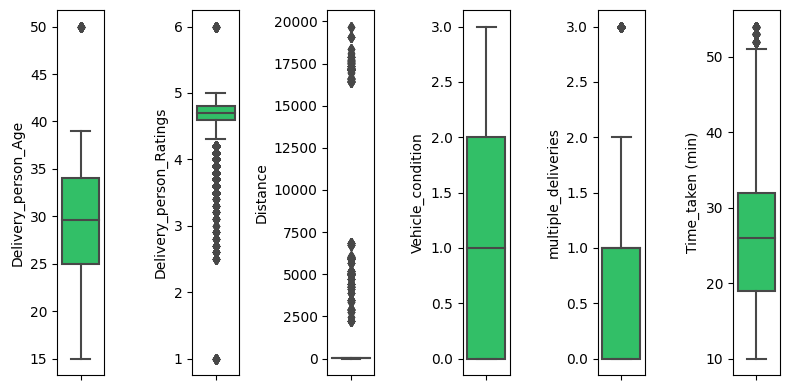

In [ ]:
# Detecting outliers using boxplot

plt.figure(figsize=(8,4))
for i in range(0, len(num_col)):
    plt.subplot(1, len(num_col), i+1)
    sns.boxplot(y = data[num_col[i]], color = '#1AD761')
    plt.tight_layout()

In [ ]:
# Check Delivery_person_Ratings and distance maximum and minimum value

column = ['Delivery_person_Ratings', 'Distance']

for col in column:
    print('Max value in {a} column is {b}'.format(a=col, b=data[col].max()))
    print('Min value in {a} column is {b}'.format(a=col, b=data[col].min()))
    print('\t')

Max value in Delivery_person_Ratings column is 6.0
Min value in Delivery_person_Ratings column is 1.0
	
Max value in Distance column is 19692.67460647305
Min value in Distance column is 1.4650674052308583
	


In [ ]:
# Check lower and upper boundary for Delivery_person_Ratings and distance column

for col in column:
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    lower_fence = data[col].quantile(0.25) - (IQR * 3)
    upper_fence = data[col].quantile(0.25) + (IQR * 3)
    print('Outliers in {a} column are < {b} or > {c}'.format(a=col, b=lower_fence, c=upper_fence))

Outliers in Delivery_person_Ratings column are < 3.999999999999999 or > 5.2
Outliers in Distance column are < -22.63795911360644 or > 31.964945393444165


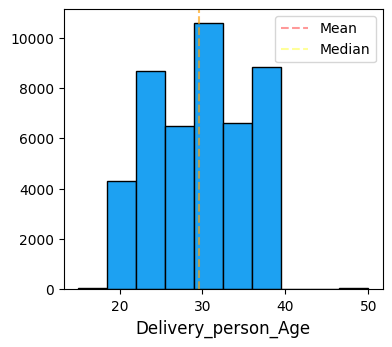

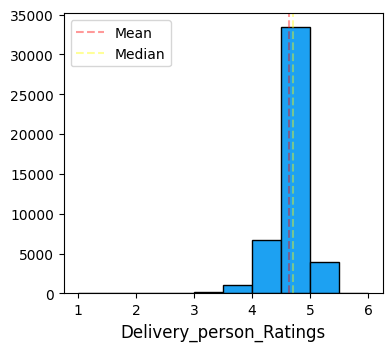

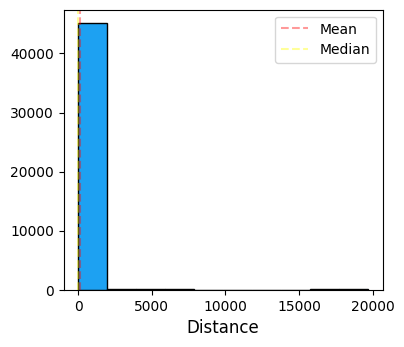

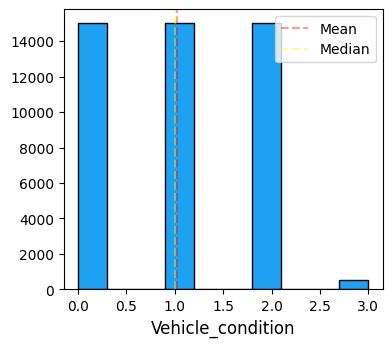

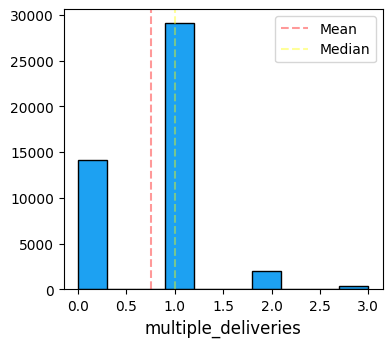

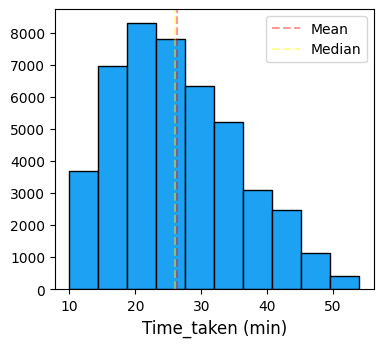

In [ ]:
# Data distribution check

for i in range(0, len(num_col)):
    plt.figure(figsize=(14,8))
    plt.subplot(2, len(num_col)//2, i+1)
    plt.hist(data[num_col[i]], color='#1DA1F2', edgecolor = 'Black')
    plt.axvline(x=data[num_col[i]].mean(),ls='--',color='red',alpha=0.4,label='Mean')
    plt.axvline(x=data[num_col[i]].median(),ls='--',color='yellow',alpha=0.4,label='Median')
    plt.xlabel(num_col[i], size=12)
    plt.legend()
    plt.show()

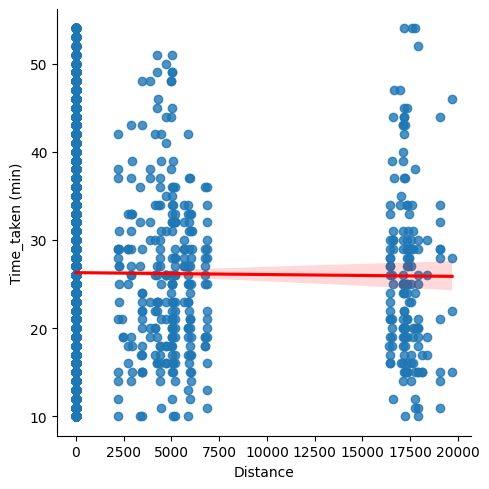

In [ ]:
# Relationship between distance with time taken

sns.lmplot(x='Distance', y="Time_taken (min)",
           line_kws={'color': 'red'}, data=data)
plt.show()

~ There is consistent relationship between the time taken and the distance travelled to deliver the food. It looks like majority food delivered within 25-27 minutes regardless of distance.

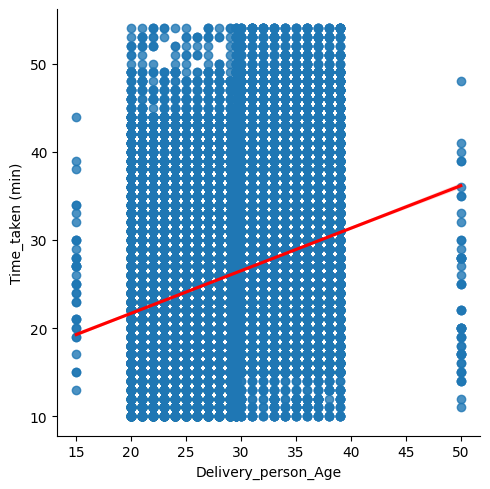

In [ ]:
# Relationship between age of the delivery partner with time taken

sns.lmplot(x='Delivery_person_Age', y="Time_taken (min)",
           line_kws={'color': 'red'}, data=data)
plt.show()

~ There is a linear relationship between the time taken to deliver the food and the age of the person who delivering the food. It looks like person with the young age able to take less time than person with old age to deliver the food to customers.

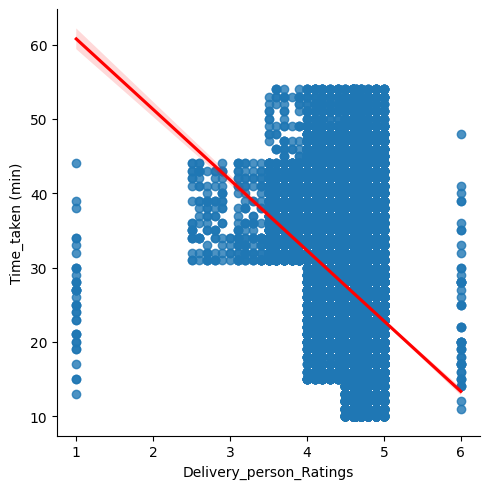

In [ ]:
# Relationship between rating with time taken

sns.lmplot(x='Delivery_person_Ratings', y="Time_taken (min)",
           line_kws={'color': 'red'}, data=data)
plt.show()

~ There is an inverse linear relationship between the time taken to deliver the food and the delivery person ratings. It looks like person with the higher ratings take a less time to deliver the food than person with low ratings.

~ Check if type of food ordered by the customer and the type of vehicle used by the delivery partner affects the delivery time or not.

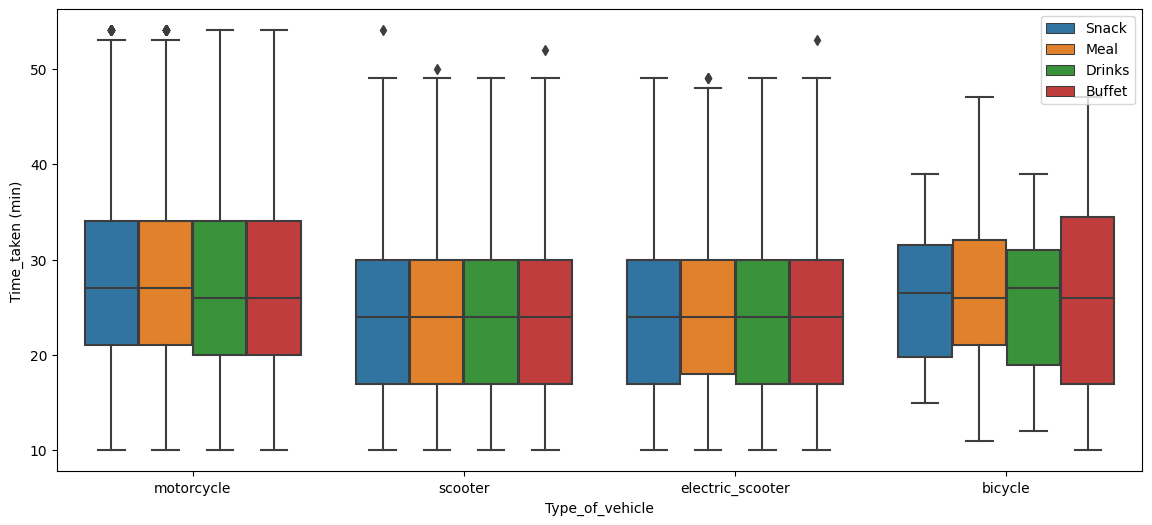

In [ ]:
# Boxplot for type of food ordered, type of vehicle, and time taken

plt.figure(figsize=(14,6))
sns.boxplot(x="Type_of_vehicle", 
            y="Time_taken (min)", hue="Type_of_order",data=data)
plt.legend(loc='upper right')
plt.show()

~ It looks like there is not much difference between the time taken depending on the vehicle they are driving and the type of food they are delivering.

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


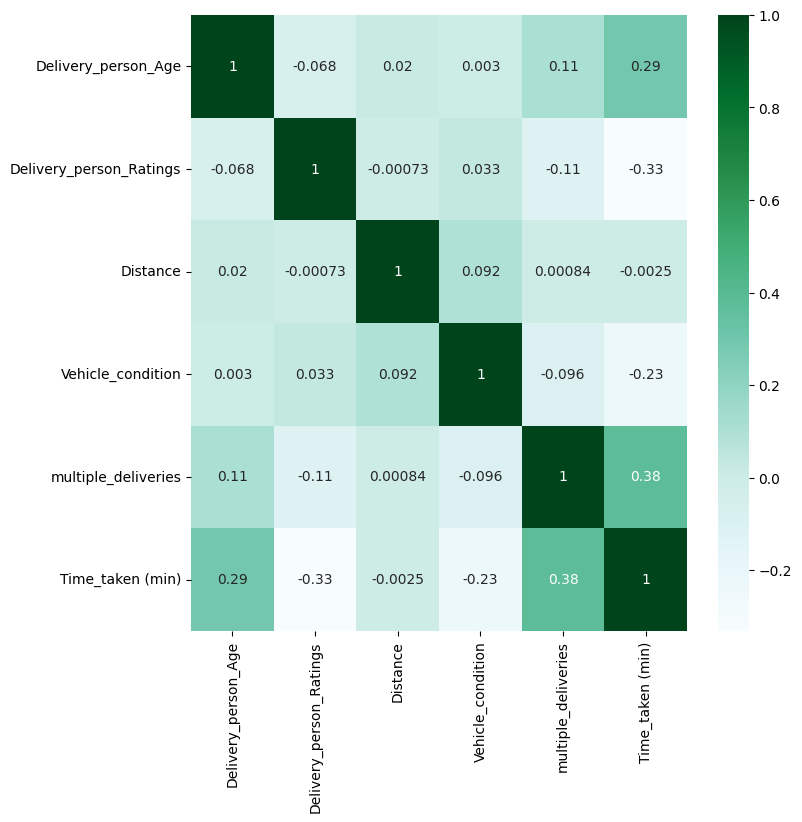

In [ ]:
# Heatmap for the correlation data

correlation = data.corr()

plt.figure(figsize = (8, 8))
sns.heatmap(correlation, annot=True, cmap='BuGn')
plt.show()

~ There are no strong correlation between features (correlation < 0.8)

~ The highest correlation with Time_taken(min) column is Delivery_person_Age with -0.33 (negative means inverse relationship)

~ Conclusion :- From the results of the exploratory data analysis that was carried out, it was concluded that the factors that most influence the time of delivering food is ratings of the delivery person with inverse relationship.

In [ ]:
# Drop unused columns

data = data.drop(['ID', 'Delivery_person_ID'], axis=1)

In [ ]:
data = data.drop(['Order_Date','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','multiple_deliveries','Festival','City'],axis=1)

In [ ]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Distance,Time_taken (min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,36.0,4.2,10.280582,46,0,0,0,1,0,0,1,0
1,21.0,4.7,6.242319,23,0,0,1,0,0,0,1,0
2,23.0,4.7,13.787860,21,0,1,0,0,0,0,0,1
3,34.0,4.3,2.930258,20,1,0,0,0,0,0,1,0
4,24.0,4.7,19.396618,41,0,0,0,1,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Delivery_person_Age               45584 non-null  float64
 1   Delivery_person_Ratings           45584 non-null  float64
 2   Distance                          45584 non-null  float64
 3   Time_taken (min)                  45584 non-null  int64  
 4   Type_of_order_Buffet              45584 non-null  uint8  
 5   Type_of_order_Drinks              45584 non-null  uint8  
 6   Type_of_order_Meal                45584 non-null  uint8  
 7   Type_of_order_Snack               45584 non-null  uint8  
 8   Type_of_vehicle_bicycle           45584 non-null  uint8  
 9   Type_of_vehicle_electric_scooter  45584 non-null  uint8  
 10  Type_of_vehicle_motorcycle        45584 non-null  uint8  
 11  Type_of_vehicle_scooter           45584 non-null  uint8  
dtypes: f

In [ ]:
# Remove outliers based on max value

def max_value(df1, variable, top):
    return np.where(df1[variable]>top, top, df1[variable])

for df1 in [data]:
  df1['Distance'] = max_value(df1, 'Distance', 31.964945393444165)

In [ ]:
# Remove outliers based on min value

def min_value(df2, variable, low):
    return np.where(df2[variable]<low, low, df2[variable])

for df2 in [data]:
  df2['Delivery_person_Ratings'] = min_value(df2, 'Delivery_person_Ratings', 3.999999999999999)

In [ ]:
# One Hot Encoding for type of order and type of vehicle

data = pd.get_dummies(data)

# Preprocessing

In [ ]:
# Split train-test data into proportion 80:20

X = data.drop(columns='Time_taken (min)')
y = data['Time_taken (min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, random_state=42)

In [ ]:
# Multicollinearity check using vif score

x = add_constant(X_train[['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance']])
df_vif = pd.DataFrame([vif(x.values, i) for i in range(x.shape[1])],
                      index = x.columns).reset_index()
df_vif.columns = ['feature', 'vif score']
df_vif = df_vif.loc[df_vif.feature != 'const']
df_vif

,feature,vif score
1,Delivery_person_Age,1.010661
2,Delivery_person_Ratings,1.016184
3,Distance,1.005494


# Model Training and Evaluation

In [ ]:
# Create rmse calculation

def rmse(targets,predictions):
    differences = predictions - targets
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

In [ ]:
# Load regression algorithms

regressors = [LinearRegression(), Ridge(), Lasso(), 
              DecisionTreeRegressor(), RandomForestRegressor()]

regressors

[LinearRegression(),
 Ridge(),
 Lasso(),
 DecisionTreeRegressor(),
 RandomForestRegressor()]

In [ ]:
# Create dataframe for model performance evaluation

df = pd.DataFrame(columns = ['Algorithm', 'RMSE'])

In [ ]:
# Model training

for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    model = str(type(regressor)).split('.')[-1][:-2]
    
    # RMSE value
    
    rmse_value = rmse(y_test, y_pred)
    
    # Input calculation result into a dataframe
    
    df = df.append({'Algorithm': model,
                    'RMSE': rmse_value},
                     ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [ ]:
# Models evaluation
df

,Algorithm,RMSE
0,LinearRegression,7.906866
1,Ridge,7.906869
2,Lasso,8.537049
3,DecisionTreeRegressor,10.561631
4,RandomForestRegressor,7.901760


In [ ]:
# Save Model to pickle file

with open('Deliver_Predict','wb') as r:
    pickle.dump(model,r)

~ Based on each RMSE (Root Squared Mean Error) result from 5 trained algorithms, best algorithm is random forest regressor because have the smallest error than other algorithms. 

~ Performance of the model will can be improved with hyperparameter tuning.

~ Conclusion :

~ Rating of person in previous delivers become is the most influential factor on the delivery time of food to the destination location. Person with the higher ratings take a less time to deliver the food than person with low ratings. 

~ Model has RMSE score 7.9 and that means error between delivery time prediction and delivery time actual is 7.9 minutes.